## Free energy analysis of D3R dataset 1 in comparison to experimental data

### Instructions
This notebook contains all the analysis carried out for the D3R Grand Challenge 2 analysis by Antonia Mey, Jordi Juarez Jimenez and Julien Michel. Simply run the notebook in order to recreate the analysis done in the accompanying publication. The analysis relies on a small module called freenergyworkflows. Please use version 0.3.5 to recreate the exact results used in the publications. 

Freenergy workflows can be installed from the github repository: https://github.com/michellab/freenrgworkflows or using pip:

```pip install freenergyworkflows```

## Imports

In [1]:
%pylab inline
from networkanalysis.networkanalysis import PerturbationGraph
from networkanalysis.experiments import ExperimentalData
from networkanalysis.stats import freeEnergyStats
from networkanalysis.plotting import FreeEnergyPlotter
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


Please make sure that version 0.3.5 for networkanalysis is used.

In [2]:
import networkanalysis
print networkanalysis.__version__

0.3.5


## 1. Reference experimental data released by organisers 

exp_ddg contains the reference experimental relative free energies for Set1.

In [3]:
exp = ExperimentalData()
exp.compute_DDG_from_IC50s('IC50_set1.csv', reference='FXR_17')
exp_ddg = exp.freeEnergiesInKcal

## 2. Stage 1 Analysis

### visual

In [4]:
visual = ExperimentalData()
visual.read_free_energies('Stage1/submission/Full_set_visual_free_energies.csv')
visual_ddg = visual.freeEnergiesInKcal

['FXR_100' 'FXR_101' 'FXR_102' 'FXR_17' 'FXR_45' 'FXR_46' 'FXR_47' 'FXR_48'
 'FXR_49' 'FXR_91' 'FXR_93' 'FXR_95' 'FXR_96' 'FXR_98' 'FXR_99']


(<matplotlib.axes._subplots.AxesSubplot at 0x11478bdd0>,
 <matplotlib.figure.Figure at 0x11478b410>)

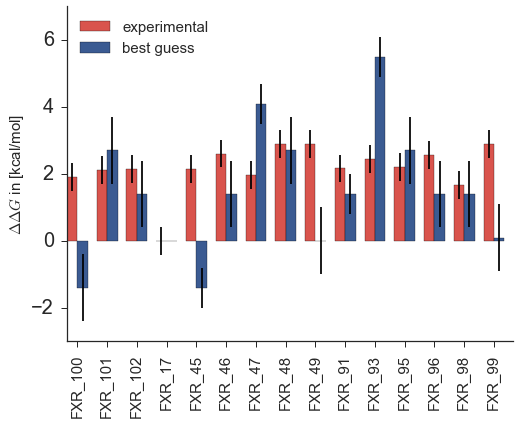

In [5]:
plotter = FreeEnergyPlotter(exp_ddg, visual_ddg)
plotter.plot_bar_plot(legend=('experimental', 'best guess'))

In [6]:
stats = freeEnergyStats()
c_list = ['FXR_17','FXR_45','FXR_46','FXR_47','FXR_48', 'FXR_49', 'FXR_91','FXR_93','FXR_95','FXR_96','FXR_98','FXR_99', 'FXR_100','FXR_101','FXR_102']
stats.generate_statistics(visual_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [7]:

r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.13 < 0.16 < 0.20
Mue is: 1.62 < 1.71 < 1.80
tau is: 0.04 < 0.07 < 0.12


## visual same net charge

In [8]:
visual = ExperimentalData()
visual.read_free_energies('Stage1/submission/Full_set_visual_free_energies.csv')
visual_ddg = visual.freeEnergiesInKcal

In [9]:
stats = freeEnergyStats()
c_list = ['FXR_17','FXR_45','FXR_46','FXR_47','FXR_48', 'FXR_49', 'FXR_91','FXR_93','FXR_95','FXR_96','FXR_98','FXR_99', 'FXR_100','FXR_102']
stats.generate_statistics(visual_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [10]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.14 < 0.17 < 0.21
Mue is: 1.67 < 1.77 < 1.86
tau is: 0.07 < 0.11 < 0.16


### Full set averaged network

In [11]:
full = ExperimentalData()
full.read_free_energies('Stage1/submission/Full_set_network_avg_free_energies.csv')
full_ddg = full.freeEnergiesInKcal

['FXR_100' 'FXR_101' 'FXR_102' 'FXR_17' 'FXR_45' 'FXR_46' 'FXR_47' 'FXR_48'
 'FXR_49' 'FXR_91' 'FXR_93' 'FXR_95' 'FXR_96' 'FXR_98' 'FXR_99']


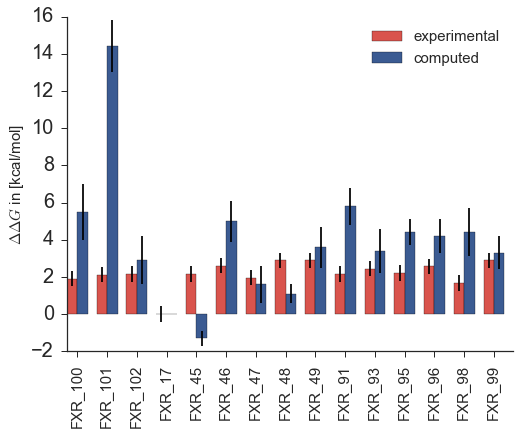

In [12]:
plotter = FreeEnergyPlotter(exp_ddg, full_ddg)
ax, fig = plotter.plot_bar_plot()


In [13]:
stats = freeEnergyStats()
c_list = ['FXR_17','FXR_45','FXR_46','FXR_47','FXR_48', 'FXR_49', 'FXR_91','FXR_93','FXR_95','FXR_96','FXR_98','FXR_99', 'FXR_100','FXR_101','FXR_102']
stats.generate_statistics(full_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [14]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %f < %f < %f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %f < %f < %f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %f < %f < %f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.136622 < 0.158013 < 0.177921
Mue is: 2.483096 < 2.592011 < 2.700470
tau is: -0.038651 < -0.000268 < 0.038651


### Full set guided

In [15]:
full_guided = ExperimentalData()
full_guided.read_free_energies('Stage1/submission/Full_set_guided_free_energies.csv')
full_guided_ddg = full_guided.freeEnergiesInKcal

['FXR_100' 'FXR_101' 'FXR_102' 'FXR_17' 'FXR_45' 'FXR_46' 'FXR_47' 'FXR_48'
 'FXR_49' 'FXR_91' 'FXR_93' 'FXR_95' 'FXR_96' 'FXR_98' 'FXR_99']


(<matplotlib.axes._subplots.AxesSubplot at 0x117ca8290>,
 <matplotlib.figure.Figure at 0x116da6150>)

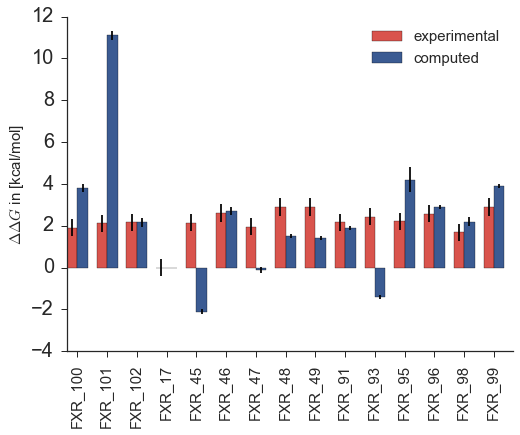

In [16]:
plotter = FreeEnergyPlotter(exp_ddg, full_guided_ddg)
plotter.plot_bar_plot()

In [17]:
stats = freeEnergyStats()
c_list = ['FXR_17','FXR_45','FXR_46','FXR_47','FXR_48', 'FXR_49', 'FXR_91','FXR_93','FXR_95','FXR_96','FXR_98','FXR_99', 'FXR_100','FXR_101','FXR_102']
stats.generate_statistics(full_guided_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [18]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %f < %f < %f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %f < %f < %f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %f < %f < %f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.136387 < 0.139644 < 0.142857
Mue is: 1.865582 < 1.889689 < 1.914171
tau is: 0.038651 < 0.053378 < 0.057977


### Same charge

In [19]:
same_charge= ExperimentalData()
same_charge.read_free_energies('Stage1/submission/Same_charge_network_avg_free_energies.csv')
same_charge_ddg = same_charge.freeEnergiesInKcal

['FXR_100' 'FXR_102' 'FXR_17' 'FXR_45' 'FXR_46' 'FXR_47' 'FXR_48' 'FXR_49'
 'FXR_91' 'FXR_93' 'FXR_95' 'FXR_96' 'FXR_98' 'FXR_99']


(<matplotlib.axes._subplots.AxesSubplot at 0x11478b890>,
 <matplotlib.figure.Figure at 0x116dcfd50>)

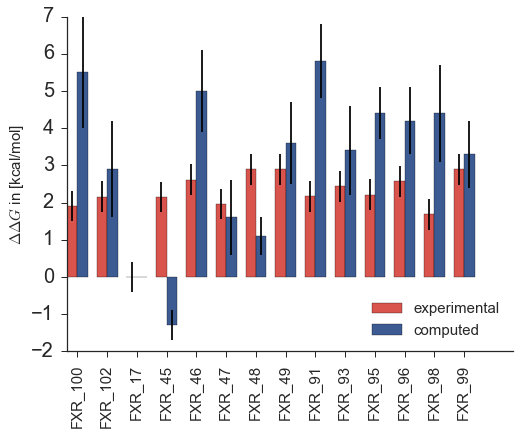

In [20]:
plotter = FreeEnergyPlotter(exp_ddg, same_charge_ddg)
plotter.plot_bar_plot()

In [21]:
stats = freeEnergyStats()
c_list = ['FXR_17','FXR_45','FXR_46','FXR_47','FXR_48', 'FXR_49', 'FXR_91','FXR_93','FXR_95','FXR_96','FXR_98','FXR_99', 'FXR_100','FXR_102']
stats.generate_statistics(same_charge_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [22]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %f < %f < %f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %f < %f < %f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %f < %f < %f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.253510 < 0.288702 < 0.323432
Mue is: 1.787211 < 1.897081 < 2.000470
tau is: 0.022350 < 0.065890 < 0.111748


## 3. Stage 2 Analysis

### Unscaled network

generate prediction

In [23]:
unscaled_network= ExperimentalData()
unscaled_network.read_free_energies('Stage2/submission/Unscaled_network_avg_free_energies.csv')
unscaled_network_ddg = unscaled_network.freeEnergiesInKcal

['FXR_100' 'FXR_101' 'FXR_102' 'FXR_17' 'FXR_45' 'FXR_46' 'FXR_47' 'FXR_48'
 'FXR_49' 'FXR_91' 'FXR_93' 'FXR_95' 'FXR_96' 'FXR_98' 'FXR_99']


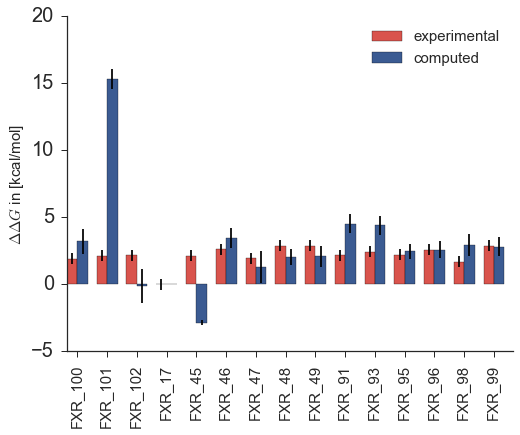

In [24]:
plotter = FreeEnergyPlotter(exp_ddg, unscaled_network_ddg)
ax,fig = plotter.plot_bar_plot()

In [25]:
stats = freeEnergyStats()
c_list = ['FXR_17','FXR_45','FXR_46','FXR_47','FXR_48', 'FXR_49', 'FXR_91','FXR_93','FXR_95','FXR_96','FXR_98','FXR_99', 'FXR_100','FXR_101','FXR_102']
stats.generate_statistics(unscaled_network_ddg,exp_ddg,repeats=20000, compound_list=c_list)

In [26]:
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.12 < 0.13 < 0.15
Mue is: 2.12 < 2.20 < 2.28
tau is: 0.02 < 0.07 < 0.12


### Network mixed scaling

In [27]:
sim_scaled = ExperimentalData()
sim_scaled.read_free_energies('Stage2/submission/Mixed_scaling_network_avg_free_energies.csv')

In [28]:
sim_ddg_scaled = sim_scaled.freeEnergiesInKcal

In [29]:
plotter = FreeEnergyPlotter(exp_ddg, sim_ddg_scaled)

['FXR_100' 'FXR_101' 'FXR_102' 'FXR_17' 'FXR_45' 'FXR_46' 'FXR_47' 'FXR_48'
 'FXR_49' 'FXR_91' 'FXR_93' 'FXR_95' 'FXR_96' 'FXR_98' 'FXR_99']


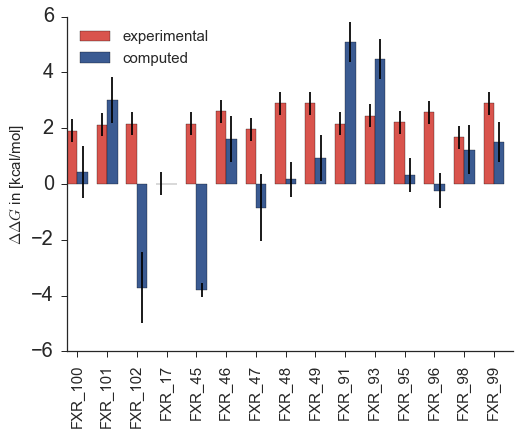

In [30]:
ax,fig = plotter.plot_bar_plot()

In [31]:
stats = freeEnergyStats()
c_list = ['FXR_17','FXR_45','FXR_46','FXR_47','FXR_48', 'FXR_49', 'FXR_91','FXR_93','FXR_95','FXR_96','FXR_98','FXR_99', 'FXR_100','FXR_101','FXR_102']
stats.generate_statistics(sim_ddg_scaled,exp_ddg,repeats=20000, compound_list=c_list)
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.10 < 0.12 < 0.14
Mue is: 2.23 < 2.32 < 2.41
tau is: 0.08 < 0.11 < 0.15


### Same charge

In [32]:
sim_same_charge = ExperimentalData()
sim_same_charge.read_free_energies('Stage2/submission/Same_charge_unscaled_free_energies.csv')
same_charge_ddg = sim_same_charge.freeEnergiesInKcal

In [33]:
plotter = FreeEnergyPlotter(exp_ddg, same_charge_ddg)

['FXR_100' 'FXR_102' 'FXR_17' 'FXR_45' 'FXR_46' 'FXR_47' 'FXR_48' 'FXR_49'
 'FXR_91' 'FXR_93' 'FXR_95' 'FXR_96' 'FXR_98' 'FXR_99']


(<matplotlib.axes._subplots.AxesSubplot at 0x117cbee10>,
 <matplotlib.figure.Figure at 0x119157450>)

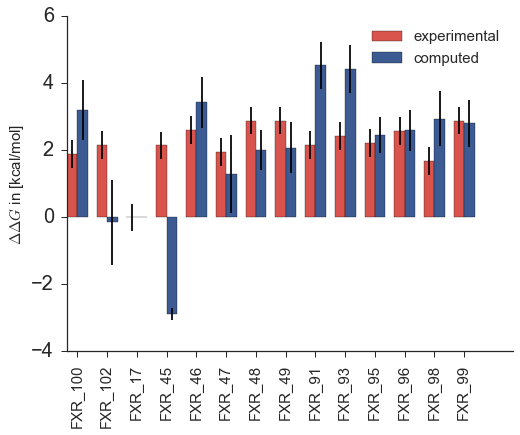

In [34]:
plotter.plot_bar_plot()

In [35]:
stats = freeEnergyStats()
c_list = ['FXR_17','FXR_45','FXR_46','FXR_47','FXR_48','FXR_49','FXR_91','FXR_93','FXR_95','FXR_96','FXR_98','FXR_99', 'FXR_100','FXR_102']
stats.generate_statistics(same_charge_ddg,exp_ddg,repeats=20000,compound_list=c_list)
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %.2f < %.2f < %.2f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %.2f < %.2f < %.2f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %.2f < %.2f < %.2f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.27 < 0.30 < 0.32
Mue is: 1.33 < 1.41 < 1.49
tau is: 0.09 < 0.15 < 0.20


### Same charge scaled 

In [36]:
sim_same_charge_scale = ExperimentalData()
sim_same_charge_scale.read_free_energies('Stage2/submission/Same_charge_scaled_free_energies.csv')
same_charge_scale_ddg = sim_same_charge_scale.freeEnergiesInKcal

['FXR_100' 'FXR_102' 'FXR_17' 'FXR_45' 'FXR_46' 'FXR_47' 'FXR_48' 'FXR_49'
 'FXR_91' 'FXR_93' 'FXR_95' 'FXR_96' 'FXR_98' 'FXR_99']


(<matplotlib.axes._subplots.AxesSubplot at 0x117baa7d0>,
 <matplotlib.figure.Figure at 0x117aaff10>)

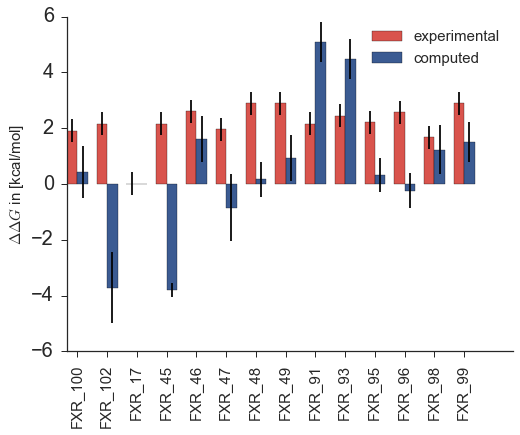

In [37]:
plotter = FreeEnergyPlotter(exp_ddg, same_charge_scale_ddg)
plotter.plot_bar_plot()

In [38]:
stats = freeEnergyStats()
c_list = ['FXR_17','FXR_45','FXR_46','FXR_47','FXR_48','FXR_49','FXR_91','FXR_93','FXR_95','FXR_96','FXR_98','FXR_99', 'FXR_100','FXR_102']
stats.generate_statistics(same_charge_scale_ddg,exp_ddg,repeats=20000,compound_list=c_list)
r_error = stats.R_error
tau_error = stats.tau_error
mue_error = stats.mue_error
print "R is: %f < %f < %f" %(r_error[0], stats.R, r_error[1])
print "Mue is: %f < %f < %f" %(mue_error[0], stats.mue, mue_error[1])
print "tau is: %f < %f < %f" %(tau_error[0], stats.tau, tau_error[1])

R is: 0.105985 < 0.128147 < 0.150290
Mue is: 2.317275 < 2.414354 < 2.508916
tau is: 0.111748 < 0.150299 < 0.178796
